# Opencv

In [5]:
from IPython.display import Image
Image(url="https://chercher.tech/images/opencv/opencv-python-logo.png")

OpenCV is the huge open-source library for the computer vision, machine learning, and image processing and now it plays a major role in real-time operation which is very important in today’s systems. By using it, one can process images and videos to identify objects, faces, or even handwriting of a human. When it integrated with various libraries, such as NumPy, python is capable of processing the OpenCV array structure for analysis. To Identify image pattern and its various features we use vector space and perform mathematical operations on these features. 

# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# creating a canvas

(-0.5, 254.5, 254.5, -0.5)

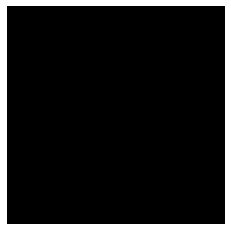

In [3]:
canvas = np.zeros((255,255,3),dtype='uint8')
cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
plt.imshow(canvas)
plt.axis('off')

Number of Contours found = 4


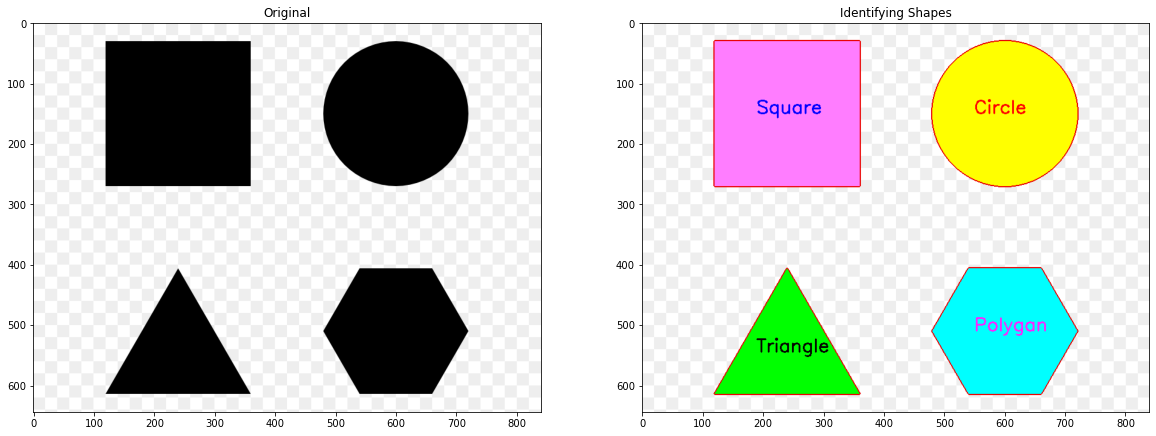

In [4]:
plt.figure(figsize=(20, 20))

shape=image = cv2.imread('shape2.png')
image = cv2.cvtColor(shape, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(shape)
ret, thresh = cv2.threshold(gray, 127, 255, 1)
# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)



print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (234,0,0), 3)



for cnt in contours:
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)
    
    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)
        
        # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (4,3, 0), 2)

    elif (len(approx) >= 5 and len(approx)<10):
        shape_name = "Polygan"
        cv2.drawContours(image,[cnt],0,(0,255,255),-1)
        
        # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 34 ,255), 2)

    
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (255, 125 ,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            shape_name = "Rectangle"
            
            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 234, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
            
    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)
        
        
        
    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (255,255,0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.subplot(2, 2, 2)
plt.title("Identifying Shapes")
plt.imshow(image)
